# Automated Preprocessing with fMRIPrep

*Written by Sasha Brietzke & Luke Chang*

In labs [6](6_Nipype_Quickstart.ipynb) & [7](7_Nipype_Preprocessing.ipynb), we learned about how [nipype](https://nipype.readthedocs.io/en/latest/) can provide a useful tool to build preprocessing pipelines in python. This provides a completely flexible way to create custom pipelines using any type of software. However, as you already may have noticed, there is a fairly steep learning curve to mastering these concepts and software. In addition, this requires thinking in depth about how you want to setup your processing pipeline and making detailed choices about the parameters for each step. In general, we think these concepts are very important to understand when performing fMRI data analysis, especially when you have messy data that might require adjusting the preprocessing steps or parameters. In practice, most researchers typically use similar preprocessing steps and do not need to tweak the pipelines very often. In addition, many researchers do not fully understand how each preprocessing step will impact their results and would prefer if somebody else picked suitable defaults based on current best practices in the literature.  

To meet this need, a team of developers from the [Center for Reproducible Research](http://reproducibility.stanford.edu/) led by Russ Poldrack and Chris Gorgolewski created an easy to use automated preprocessing pipeline called [fmriprep](https://fmriprep.readthedocs.io/en/stable/).

fmriprep is a functional magnetic resonance imaging (fMRI) data preprocessing pipeline that is designed to provide an easily accessible, state-of-the-art interface that is robust to variations in scan acquisition protocols and that requires minimal user input, while providing easily interpretable and comprehensive error and output reporting. It performs basic processing steps (coregistration, normalization, unwarping, noise component extraction, segmentation, skullstripping etc.) providing outputs that can be easily submitted to a variety of group level analyses, including task-based or resting-state fMRI, graph theory measures, surface or volume-based statistics, etc.

Note, fmriprep performs *minimal preprocessing*. Here we define *minimal preprocessing* as motion correction, field unwarping, normalization, bias field correction, and brain extraction. See the workflows_ for more details.

The fmriprep pipeline uses a combination of tools from well-known software packages, including FSL_, ANTs_, FreeSurfer_ and AFNI_. This pipeline was designed to provide the best software implementation for each state of preprocessing, and will be updated as newer and better neuroimaging software become available.

This tool allows you to easily do the following:

- Take fMRI data from raw to fully preprocessed form.
- Implement tools from different software packages.
- Achieve optimal data processing quality by using the best tools available.
- Generate preprocessing quality reports, with which the user can easily identify outliers.
- Receive verbose output concerning the stage of preprocessing for each subject, including meaningful errors.
- Automate and parallelize processing steps, which provides a significant speed-up from typical linear, manual processing.
- More information and documentation can be found at https://fmriprep.readthedocs.io/


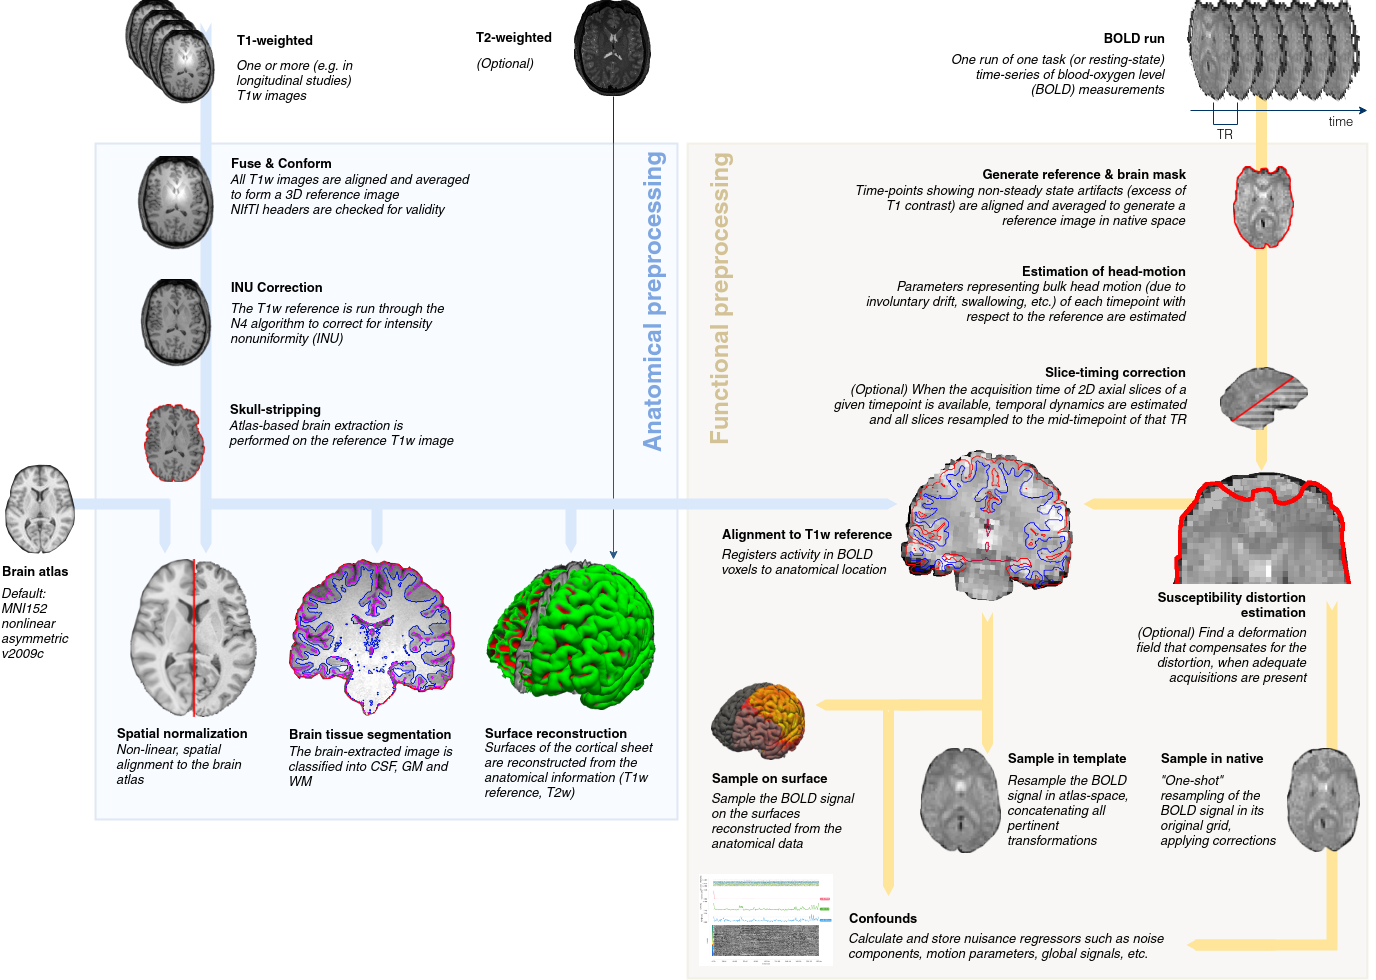

# BIDS: Brain Imaging Dataset Specification

In order to make an automated preprocessing system, it is necessary to have some standards in how the data is organized and named. Historically, this has been a nightmare, where each lab uses their own idiosyncratic conventions.

Recently, there has been increasing momentum in the neuroimaging community to create a consisten file organization system. This specification is called **BIDS** for [Brain Imaging Dataset Specification](http://bids.neuroimaging.io/).

As you can imagine, individuals have idiosyncratic ways of maintaining files. Think about how you keep track of your files on your personal laptop (versus how your friend does). This may be okay in the personal realm, but in science, it's best if anyone—including yourself 6 months from now—can follow your work and know *which* files mean *what* by their titles.

Here's an example of non-Bids versus BIDS dataset found in [this paper](https://www.nature.com/articles/sdata201644):
<br>
<br>

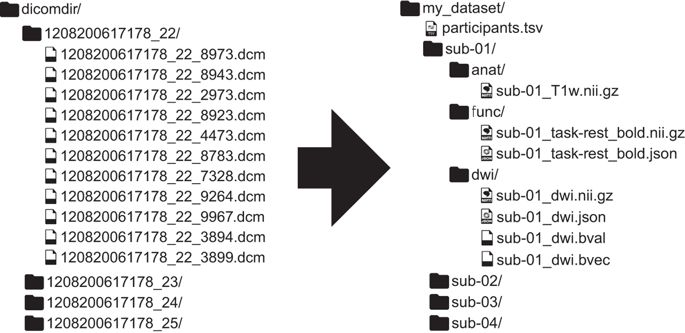

<br>
Few major differences between above datasets: <br>
1. In BIDS, files are in nifti format (not dicoms). <br>
2. In BIDS, scans are broken up into separate folders by type of scan(functional versus anatomical versus diffusion weighted) for each subject. <br>
3. In BIDS, JSON files are included that contain descriptive information about the scans (e.g., acquisition parameters) <br>

Not only can using this specification be useful within labs to have a set way of structuring data, but it can also be useful when collaborating across labs, developing and utilizing software, and publishing data.

In addition, because this is a consistent format, it is possible to have a python package to make it easy to query a dataset. We recommend using [pybids](https://github.com/bids-standard/pybids).

_________________________
There are a number of ways to [convert](https://neurostars.org/t/convert-data-to-bids-format/720) from dicom to BIDS. Dataset for the tutorial has already been converted on OpenNeuro, so let's check out our BIDS dataset.

You may need to install [pybids]() to query the BIDS datasets using following command `!pip install pybids`.

In [1]:
from bids import BIDSLayout, BIDSValidator
import os

Failed to import duecredit due to No module named 'duecredit'


In [3]:
# set path for data
your_netid = 'f00275v'
data_dir = '/dartfs/rc/lab/P/Psych60/data/ds000114'
output_dir = '/dartfs/rc/lab/P/Psych60/students_output/%s/7_nipype_preprocessing' % your_netid

# root_dir = '/dartfs-hpc/rc/home/3/f002tx3/'  # change root path to you own (change netID to your own)
# data_path = os.path.join(root_dir, 'Psych60', 'data', 'ds000114') 

You can also validate a dataset to check if its BIDS compliant. For simplicity, I'll just check if all Finger Foot Lips files are BIDS compliant.

In [4]:
validator = BIDSValidator()
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("fingerfootlips_bold.nii.gz"):
            print( file, validator.is_bids(os.path.join(root[51:], file)) )

sub-04_ses-retest_task-fingerfootlips_bold.nii.gz False
sub-04_ses-test_task-fingerfootlips_bold.nii.gz False
sub-02_ses-retest_task-fingerfootlips_bold.nii.gz False
sub-02_ses-test_task-fingerfootlips_bold.nii.gz False
sub-03_ses-retest_task-fingerfootlips_bold.nii.gz False
sub-03_ses-test_task-fingerfootlips_bold.nii.gz False
sub-08_ses-retest_task-fingerfootlips_bold.nii.gz False
sub-08_ses-test_task-fingerfootlips_bold.nii.gz False
sub-01_ses-retest_task-fingerfootlips_bold.nii.gz False
sub-01_ses-test_task-fingerfootlips_bold.nii.gz False
sub-10_ses-retest_task-fingerfootlips_bold.nii.gz False
sub-10_ses-test_task-fingerfootlips_bold.nii.gz False
sub-06_ses-retest_task-fingerfootlips_bold.nii.gz False
sub-06_ses-test_task-fingerfootlips_bold.nii.gz False
sub-07_ses-retest_task-fingerfootlips_bold.nii.gz False
sub-07_ses-test_task-fingerfootlips_bold.nii.gz False
sub-09_ses-retest_task-fingerfootlips_bold.nii.gz False
sub-09_ses-test_task-fingerfootlips_bold.nii.gz False


We can also create a BIDS layout, that helps us to quickly pull all files of a like "type".

In [5]:
# Create a BIDSLayout of your study
my_study = BIDSLayout(data_dir, derivatives=True)
my_study

BIDS Layout: ...rc/lab/P/Psych60/data/ds000114 | Subjects: 9 | Sessions: 18 | Runs: 0

We can take a closer look at one of our BID's file within the study and glean some information. Looks like file #80 corresponds to subject 1's BOLD data for the "Finger Foot Lips" run of the retest session.

In [6]:
file = my_study.get()[80]
file.entities

{'subject': '01',
 'session': 'test',
 'task': 'covertverbgeneration',
 'suffix': 'bold',
 'datatype': 'func'}

To that end, we can grab all of the "Finger Foot Lips" runs in the retest session by using the "get" method, which stores file extensions in a list

In [7]:
my_study.get(task='fingerfootlips', session='retest', return_type='file')

['/dartfs/rc/lab/P/Psych60/data/ds000114/sub-01/ses-retest/func/sub-01_ses-retest_task-fingerfootlips_bold.nii.gz',
 '/dartfs/rc/lab/P/Psych60/data/ds000114/sub-02/ses-retest/func/sub-02_ses-retest_task-fingerfootlips_bold.nii.gz',
 '/dartfs/rc/lab/P/Psych60/data/ds000114/sub-03/ses-retest/func/sub-03_ses-retest_task-fingerfootlips_bold.nii.gz',
 '/dartfs/rc/lab/P/Psych60/data/ds000114/sub-04/ses-retest/func/sub-04_ses-retest_task-fingerfootlips_bold.nii.gz',
 '/dartfs/rc/lab/P/Psych60/data/ds000114/sub-06/ses-retest/func/sub-06_ses-retest_task-fingerfootlips_bold.nii.gz',
 '/dartfs/rc/lab/P/Psych60/data/ds000114/sub-07/ses-retest/func/sub-07_ses-retest_task-fingerfootlips_bold.nii.gz',
 '/dartfs/rc/lab/P/Psych60/data/ds000114/sub-08/ses-retest/func/sub-08_ses-retest_task-fingerfootlips_bold.nii.gz',
 '/dartfs/rc/lab/P/Psych60/data/ds000114/sub-09/ses-retest/func/sub-09_ses-retest_task-fingerfootlips_bold.nii.gz',
 '/dartfs/rc/lab/P/Psych60/data/ds000114/sub-10/ses-retest/func/sub-10_s

# Introduction to BIDS Apps, Containers, and HPCs

Once you have your data converted to BIDS, there are a number of handy [BIDS Apps](http://bids-apps.neuroimaging.io/apps/) that you can use. These BIDS Apps all leverage package software called *containers*.

Containers, like [Docker](https://www.docker.com/resources/what-container) and [Singularity](https://singularity.lbl.gov/about), can be thought of as metaphorical containers for software that can be easily moved across destinations. Much like Blue Apron provides all the ingredients needed to make a recipe, containers warehouse all of the software needed to implement an analysis in a single image. This is very handy as a research tool because it allows **portability**, an **easy way to share**, and most importantly, **reproducibility**. 

Check out this [tutorial on Docker](https://github.com/Summer-MIND/mind_2018/blob/master/slides/docker.pdf) and this [tutorial on Singularity](http://mvdoc.me/2017/using-singularity-to-make-analyses-reproducible.html) to understand how to build and run these images in greater depth. We won't need to prepare an image for this class—we will just run the computing environment provided by fmriprep.

### Quick primer on High Performance Computing

We could run fmriprep on our computer, but this could take a long time if we have a lot of participants. Because we have a limited amount of computatational resources on our laptops (e.g., cpus, and memory), we would have to run each participant sequentially. For example, if we had 50 participants, it would take 50 times longer to run all participants than a single one. 

Imagine if you had 50 computers and ran each participant separate at the same time in parallel across all of the computers. This would allow us to run 50 participants in the same amount of time as a single participant. This is the basic idea behind high performance computing, which contains a cluster of many computers that have been isntalled in racks. Below is a picture of what Dartmouth's [Discovery cluster](http://techdoc.dartmouth.edu/discovery/) looks like:

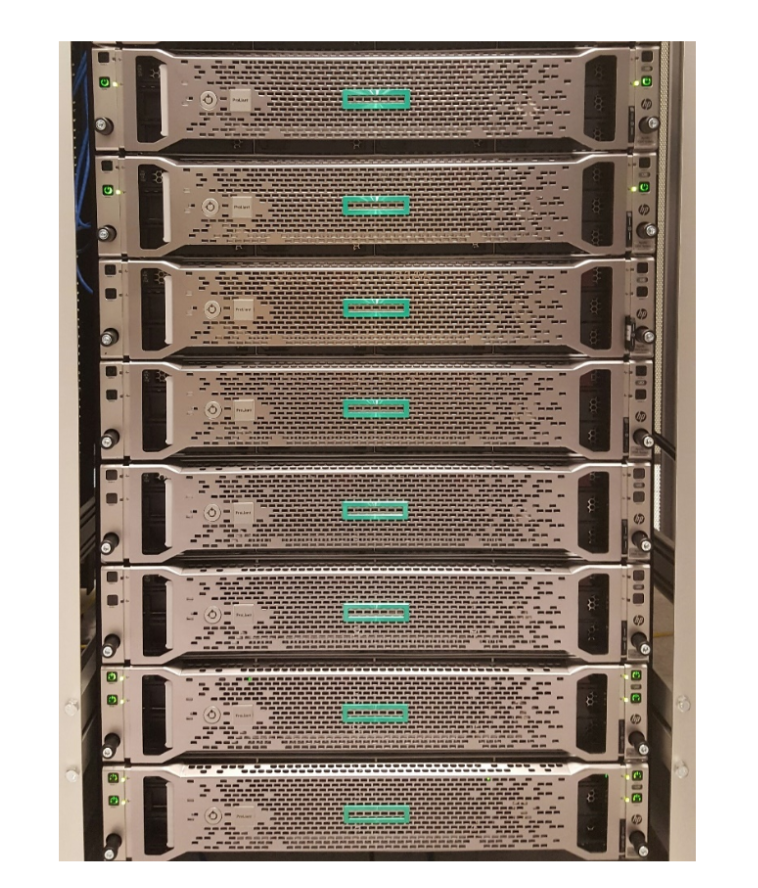
A cluster is simply a collection of nodes. A node can be thought of as an individual computer. Each node contains processors, which encompass multiple cores. Discovery contains 3000+ cores, which is certainly a lot more than your laptop!

In order to submit a job, you can create a Portable Batch System (PBS) script that sets up the parameters (e.g., how much time you want your script to run, specifying directory to run, etc) and submits your job to a queue.

**NOTE**: You will need to request access to the *discovery* system in order to run this tutorial using this [link](https://caligari.dartmouth.edu/accounts/index.php). For the purposes of this class, it will not be necessary to use the cluster outside of the jupyterhub environment.

# fmriprep

See an example of a PBS script below used to run fMRIprep for sub-01 in the ds000114 dataset. 

You would want everything to be about the same, except swapping out email and directories singularity binds to.

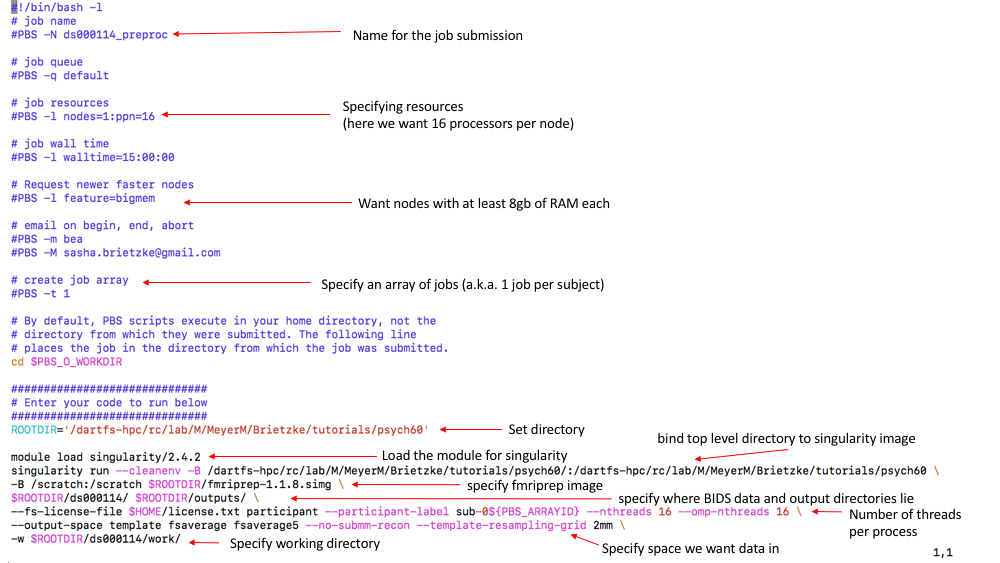

You need to save this file as a ".pbs" script and run it on the command line using the command:

`mksub <.pbs script>`

You can check the status of your job using the following command:

`myjobs`

It will take several hours to run (especially if you elect to do Freesurfer recon-all), but it's just one line! Kind of amazing!


# fMRIprep Quality Control Output

There are many outputs of fMRIprep with various nifti files that have undergone stages of preprocessing. Here are all the files generated from one session of subject's functional data, located in the `derivatives` folder.

In [13]:
bids_derivs = os.path.join(data_dir, 'derivatives', 'fmriprep', 'sub-01', 'ses-test', 'func')

os.listdir(bids_derivs)

['sub-01_ses-test_task-linebisection_bold_space-mni152nlin2009casym_brainmask.nii.gz',
 'sub-01_ses-test_task-overtwordrepetition_bold_confounds.tsv',
 'sub-01_ses-test_task-fingerfootlips_bold_space-mni152nlin2009casym_brainmask.nii.gz',
 'sub-01_ses-test_task-fingerfootlips_bold_space-fsaverage5.r.func.gii',
 'sub-01_ses-test_task-overtwordrepetition_bold_space-fsaverage5.l.func.gii',
 'sub-01_ses-test_task-overtwordrepetition_bold_space-mni152nlin2009casym_preproc.nii.gz',
 'sub-01_ses-test_task-linebisection_bold_confounds.tsv',
 'sub-01_ses-test_task-overtwordrepetition_bold_space-fsaverage5.r.func.gii',
 'sub-01_ses-test_task-covertverbgeneration_bold_space-fsaverage5.r.func.gii',
 'sub-01_ses-test_task-overtverbgeneration_bold_space-fsaverage5.l.func.gii',
 'sub-01_ses-test_task-linebisection_bold_space-fsaverage5.r.func.gii',
 'sub-01_ses-test_task-covertverbgeneration_bold_space-mni152nlin2009casym_brainmask.nii.gz',
 'sub-01_ses-test_task-linebisection_bold_space-fsaverage5.l

You can see a summary of the operations fmriprep performed by examining the .html files. See below: <br>

You can also find in `derivatives/fmriprep` folder within data directory.

In [ ]:
from IPython.display import Image, HTML
output_file = os.path.join(data_dir, 'derivatives', 'fmriprep', 'sub-01.html')

HTML(output_file)

**Interpreting Output**

For every functional Run you will see the following plots:

*Anatomical Scans*

ANTS Brain Extraction:
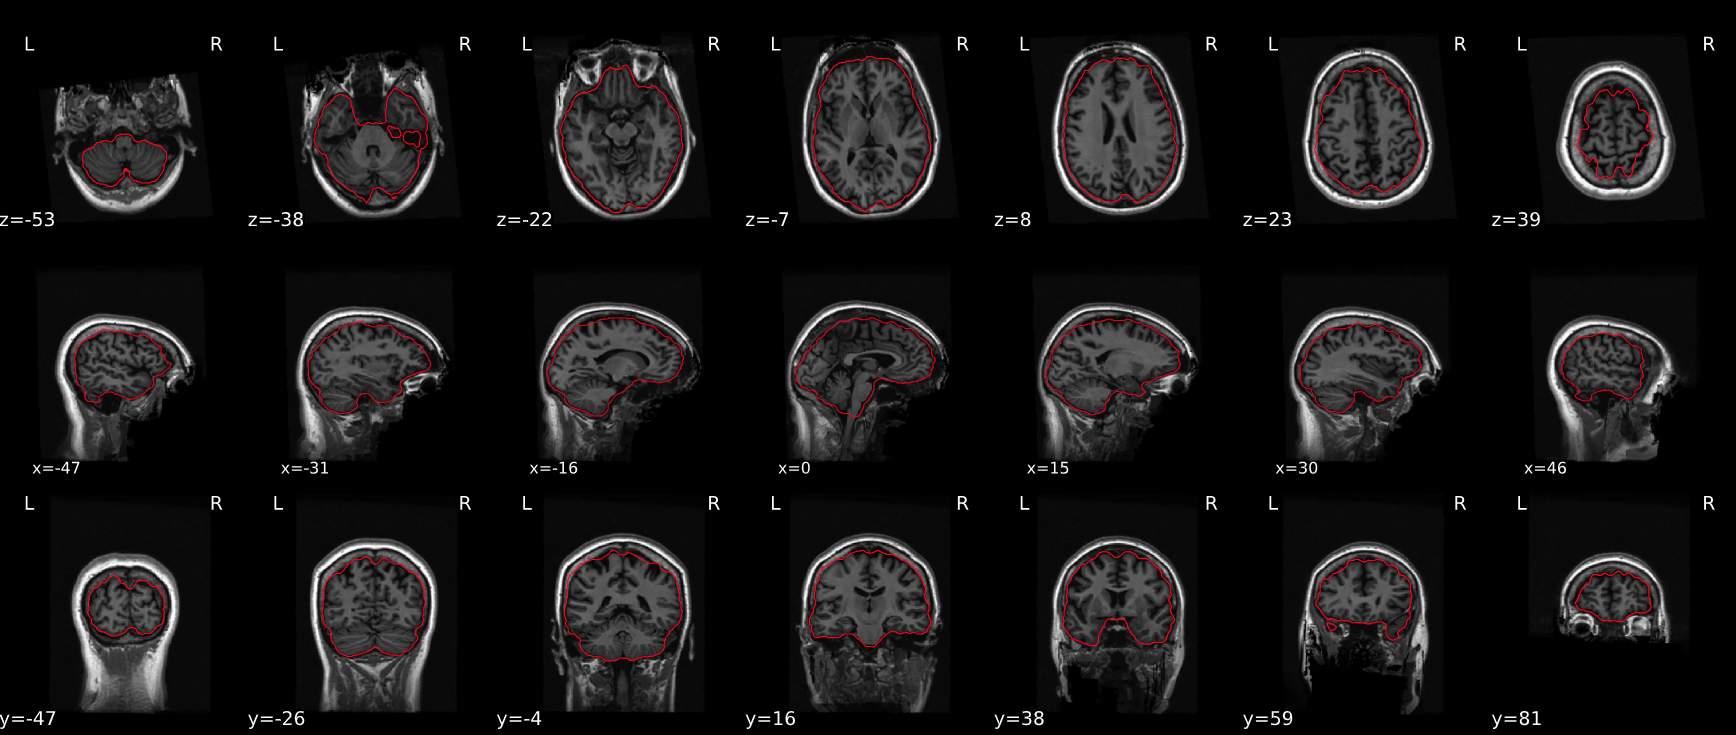

<br>

T1 Segmentation 
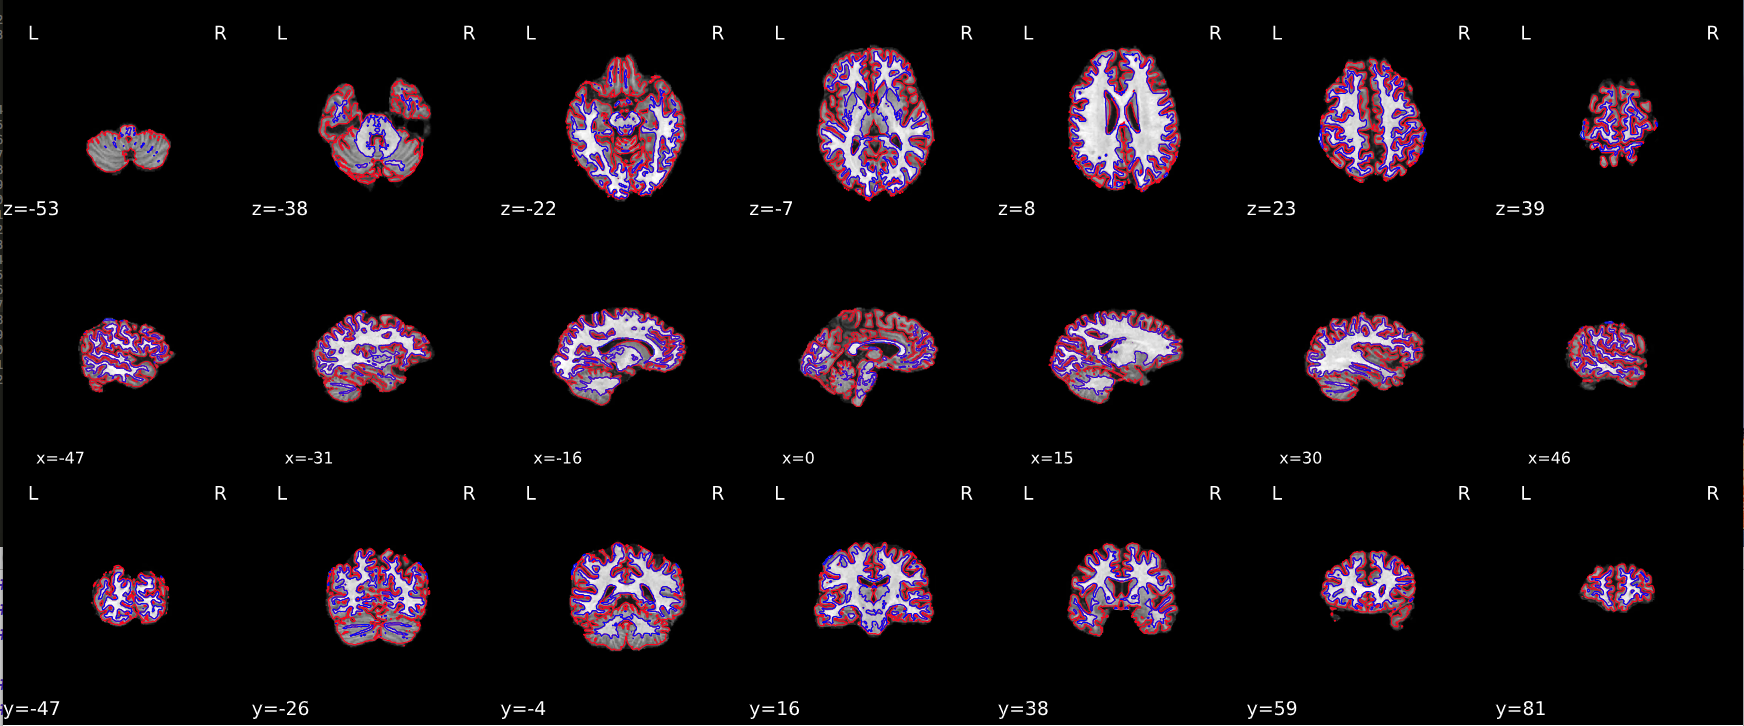

T1 to MNI Registration (presented as a GIF to view overlay)

*Functional Scans*

Skull stripped EPI (notice these images are much blurrier and show some distortion compared to the T1s):
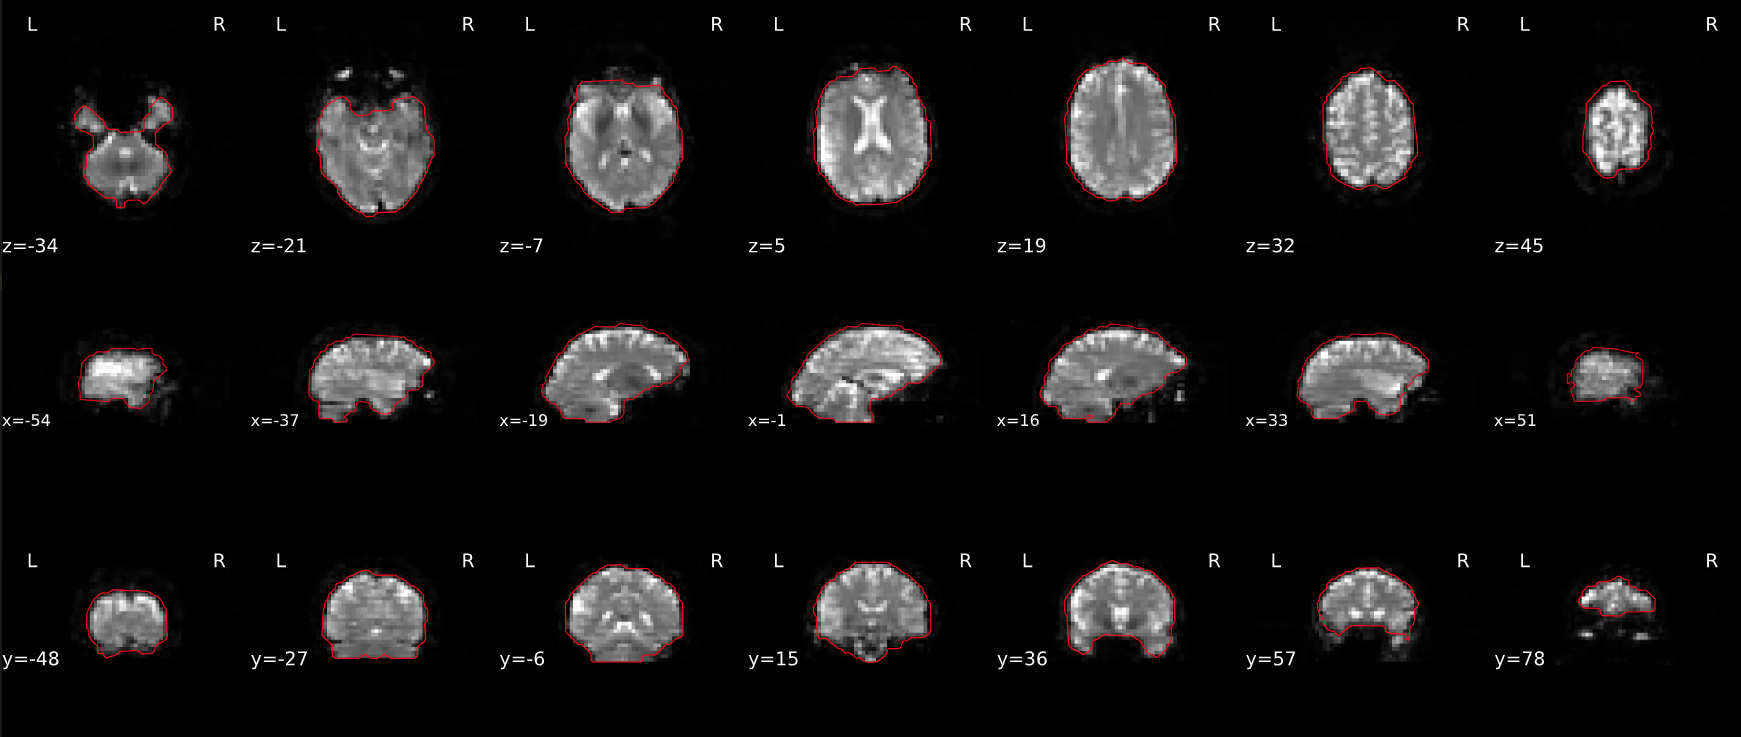

EPI to T1 Registration (presented as a GIF to view the overlay)

aCompCor Mask (Aims to mitigate head motion by regressing out CSF and white matter. You can read more about it in [this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4043948/): 
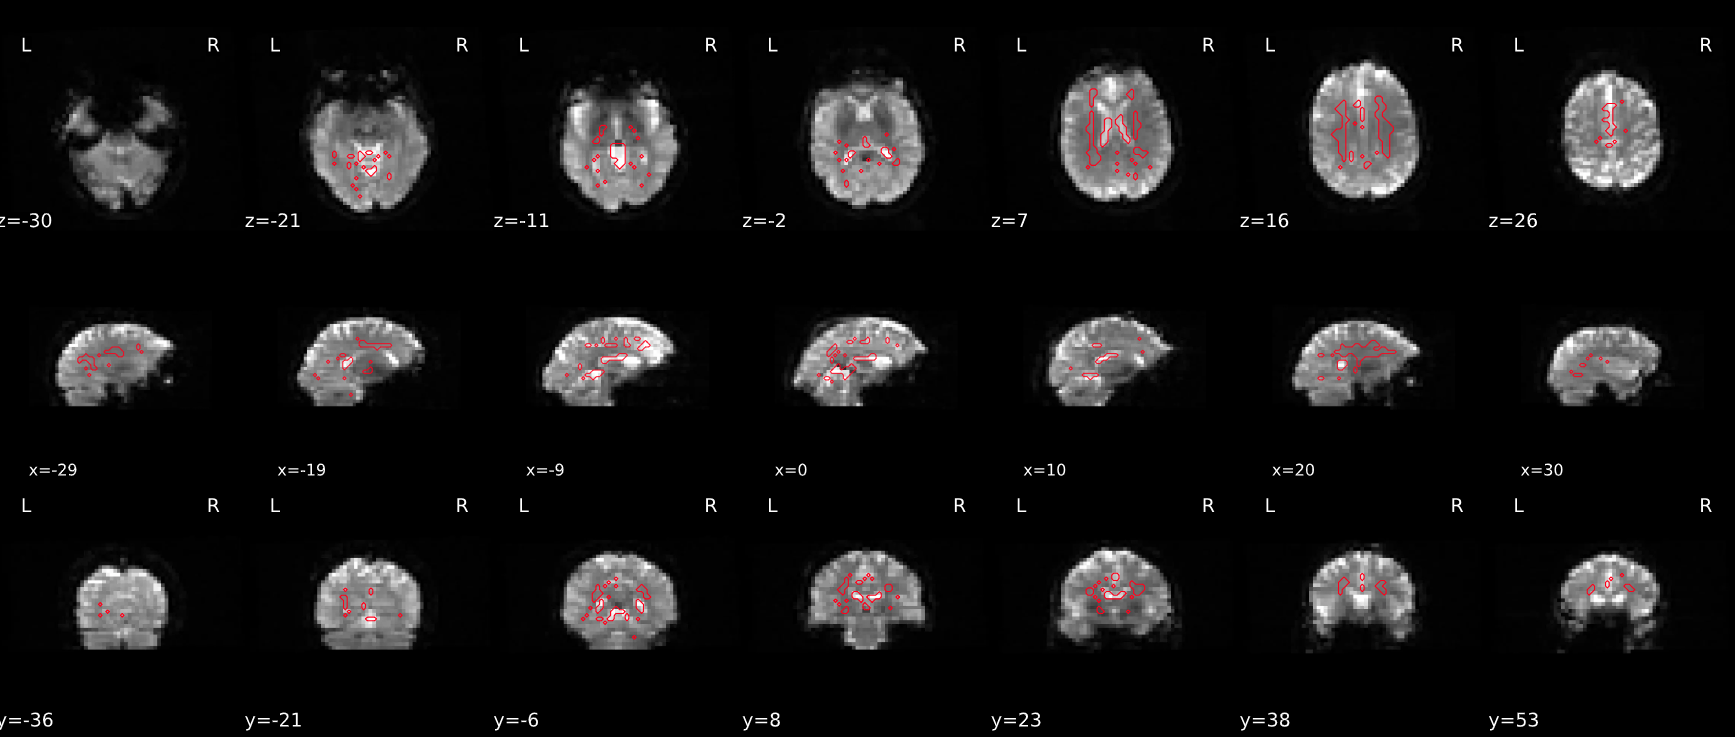


Carpet Plots are designed to be 1 figure that gives a snapshot of data quality of a single scan. <br>

X axis reflects time and Y axis reflects all the voxels in the brain (blue=cortex, orange=subcortical structures, green=cerebellum, red=white matter and CSF).
<br> You may notice head motion (framewise displacement) increases correspond to a black line reflecting signal dropout in the plot. You can read more about this in the [paper](https://www.sciencedirect.com/science/article/pii/S1053811916303871?via%3Dihub) introducing carpet plots.
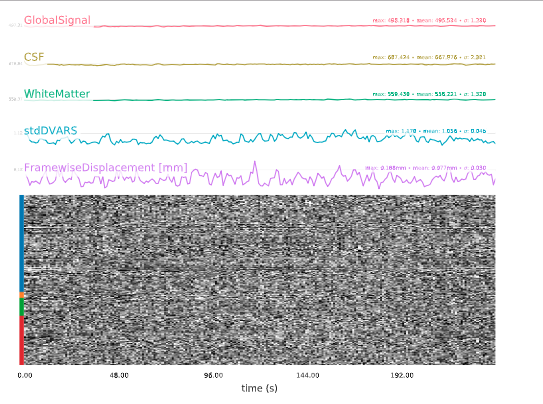

# Limitations of fmriprep

In general, we recommend using this pipeline if you want a sensible default. Considerable thought has gone into selecting reasonable default parameters and selecting preprocessing steps based on best practices in the field (as determined by the developers). This is not necessarily the case for any of the default settings in any of the more conventional software packages (e.g., spm, fsl, afni, etc). 

However, there is an important tradeoff in using this tool. On the one hand, it's nice in that it is incredibly straightforward to use (one line of code!), has excellent documentation, and is actively being developed to fix bugs and improve the overall functionality. There is also a growing user base to ask questions.  [Neurostars](https://neurostars.org/) is an excellent form to post questions and learn from others. On the other hand, fmriprep, is unfortunately in its current state not easily customizable. If you disagree with the developers about the order or specific preprocessing steps, it is very difficult to modify. Future versions will hopefully be more modular and easier to make custom pipelines.  If you need this type of customizability we strongly recommend using nipype over fmriprep.